In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_datos_trimes=pd.read_csv('datos_trimes_sinID.csv',delimiter=',',header='infer')

In [17]:
df_datos_trimes.head(4)

,Año,Trimestre,Periodo,Accesos por cada 100 hogares,Accesos por cada 100 hab,Banda ancha fija,Dial up,Total_BA,ADSL,Cablemodem,...,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,Otros_velo_rango,Total_velo_rango,Ingresos (miles de pesos)
0,2022,1,Ene-Mar 2022,73.88,23.05,10611390,12619,10624009,1533240,6073426,...,34890.0,104840.0,1263273.0,1209148.0,967508.0,509830.0,6336187.0,198333.0,10624009.0,51432896
1,2021,4,Oct-Dic 2021,73.18,22.81,10476933,12861,10489794,1657615,5984240,...,41262.0,28521.0,1413208.0,1245333.0,976539.0,558358.0,6032322.0,194251.0,10489794.0,45467887
2,2021,3,Jul-Sept 2021,70.58,21.98,10075184,10357,10085541,1950631,5826257,...,40174.0,41437.0,2550229.0,1095772.0,710122.0,536364.0,4948174.0,163269.0,10085541.0,42999944
3,2021,2,Abr-Jun 2021,69.24,21.55,9852702,10382,9863084,2018587,5641731,...,40172.0,42024.0,2531271.0,1080279.0,693277.0,647401.0,4661291.0,167369.0,9863084.0,38239667


>## Antes de empezar
>   
>**Es importante remarcar que los datos utilizados solo cotemplan hasta el 1er trimestre del año 2022, como se describe en las siguientes 02 gráficas**

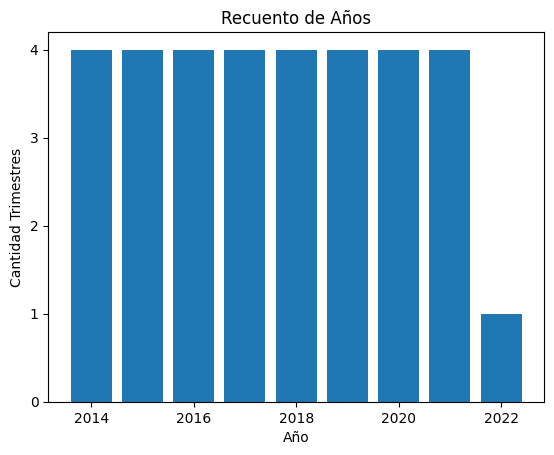

In [18]:
%matplotlib inline
conteo_años = df_datos_trimes['Año'].value_counts().sort_index()
#plt.figure(figsize=(12, 8))
plt.bar(conteo_años.index, conteo_años.values)
plt.xlabel('Año')
plt.ylabel('Cantidad Trimestres')
plt.title('Recuento de Años')
# Establecer los valores del eje y manualmente
plt.yticks(range(int(conteo_años.max()) + 1))
plt.show()


**Podemos notar que que el año 2022 solo tiene 1 trimestre (Enero-Marzo)**

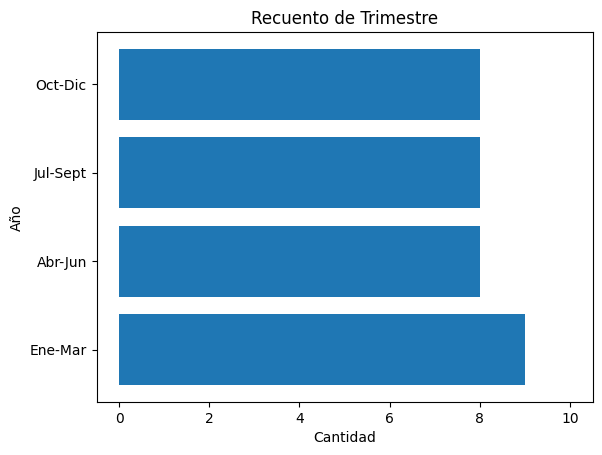

In [19]:
conteo_tri = df_datos_trimes['Trimestre'].value_counts().sort_index()
plt.barh(['Ene-Mar','Abr-Jun','Jul-Sept','Oct-Dic'], conteo_tri.values.astype(int))
plt.xlabel('Cantidad')
plt.ylabel('Año')
plt.title('Recuento de Trimestre')
# Establecer los límites del eje y manualmente
plt.xlim(-0.5, len(conteo_años)-0.5 +2 )
plt.show()

---

# Análisis de los Datos Trimestrales

In [20]:
df_datos_trimes.dtypes

Año                               int64
Trimestre                         int64
Periodo                          object
Accesos por cada 100 hogares    float64
Accesos por cada 100 hab        float64
Banda ancha fija                  int64
Dial up                           int64
Total_BA                          int64
ADSL                              int64
Cablemodem                        int64
Fibra óptica                      int64
Wireless                          int64
Otros_tecno                       int64
Total_tecno                       int64
Mbps (Media de bajada)          float64
Hasta 512 kbps                  float64
Entre 512 Kbps y 1 Mbps         float64
Entre 1 Mbps y 6 Mbps           float64
Entre 6 Mbps y 10 Mbps          float64
Entre 10 Mbps y 20 Mbps         float64
Entre 20 Mbps y 30 Mbps         float64
Más de 30 Mbps                  float64
Otros_velo_rango                float64
Total_velo_rango                float64
Ingresos (miles de pesos)         int64


In [21]:
#Analisis de las variables numericas
descripcion = df_datos_trimes.drop(['Año','Trimestre'], axis=1).describe(include='number').round(1)
descripcion

,Accesos por cada 100 hogares,Accesos por cada 100 hab,Banda ancha fija,Dial up,Total_BA,ADSL,Cablemodem,Fibra óptica,Wireless,Otros_tecno,...,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,Otros_velo_rango,Total_velo_rango,Ingresos (miles de pesos)
count,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,...,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0
mean,59.3,18.3,8108474.5,20720.4,8132521.3,3137917.6,4008480.5,614314.2,219996.7,122928.8,...,51088.4,252235.3,3771890.1,880732.5,923801.2,505049.9,1599202.0,103903.0,8087902.6,17849908.3
std,7.3,2.4,1269430.9,11717.2,1260190.3,754929.9,1166214.8,612790.3,170710.3,96506.6,...,54547.8,202020.8,1173775.6,243586.4,502754.4,486394.0,2066393.3,99722.0,1304616.6,14188848.0
min,49.6,15.0,6362108.0,2853.0,6398398.0,1533240.0,2407330.0,139187.0,1653.0,543.0,...,5675.0,28521.0,1263273.0,289182.0,101127.0,345.0,11595.0,0.0,6272846.0,2984054.0
25%,52.6,16.1,6952289.0,10016.0,6984831.0,2299457.0,2898226.0,167788.0,82077.0,56122.0,...,22366.0,56170.0,2651502.0,762999.0,641646.0,27664.0,23380.0,0.0,6916766.0,5936845.0
50%,58.8,18.1,8009981.0,21812.0,8037053.0,3574294.0,3981129.0,217460.0,155775.0,71573.0,...,39510.0,219467.0,3444458.0,975027.0,807775.0,523437.0,397977.0,138840.0,8037053.0,13171459.0
75%,64.5,20.0,9021040.0,32475.0,9031056.0,3723518.0,4903674.0,1047817.0,352333.0,247016.0,...,41262.0,404810.0,5049640.0,1046128.0,1169632.0,647401.0,3500882.0,194212.0,9031056.0,29946216.0
max,73.9,23.0,10611390.0,39324.0,10624009.0,3803024.0,6073426.0,2219533.0,545814.0,265328.0,...,241713.0,687619.0,5153437.0,1245333.0,2068087.0,1690612.0,6336187.0,247983.0,10624009.0,51432896.0


---

> **Relacion entre año y Accesos por cada 100 hogares:** *Podemos observar que a medida que pasan los años los accesos por cada 100 hogares 
> aumenta* , cabe resaltar que por cada año aparecen 4 puntos indicando el trimestre

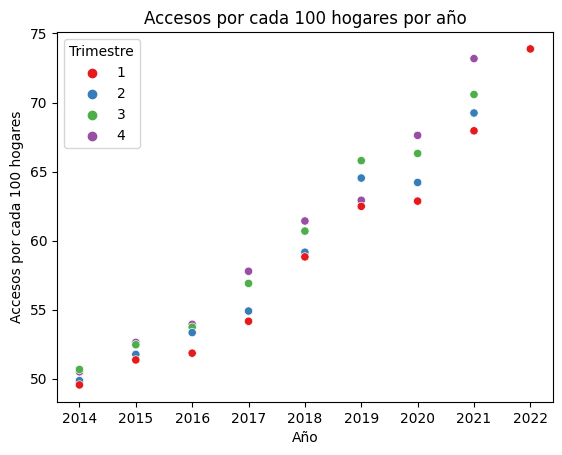

In [22]:

colores = sns.color_palette("Set1", 4)
sns.scatterplot(data=df_datos_trimes, x='Año', y='Accesos por cada 100 hogares', hue='Trimestre',palette=colores)
plt.title('Accesos por cada 100 hogares por año')
plt.show()

Text(0.5, 0, 'Mbps (Media de bajada)')

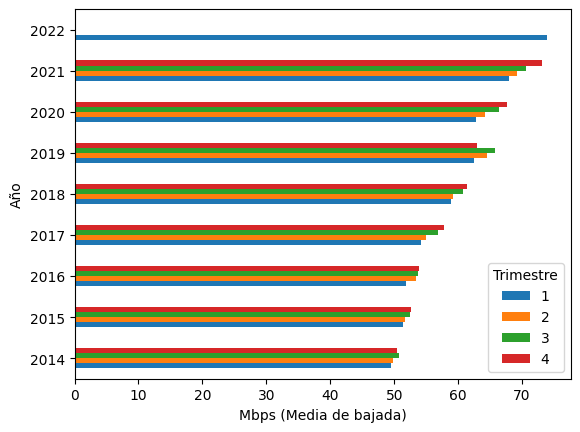

In [23]:
df_datos_trimes.groupby(['Año','Trimestre'])['Accesos por cada 100 hogares'].mean().unstack(1).plot.barh()
plt.xlabel('Mbps (Media de bajada)')

---

* #####   **Relacion entre año y banda ancha o angosta:** *Podemos observar que a medida que pasan los años los accesos por cada 100 hogares aumenta , cabe resaltar que por cada año aparecen 4 puntos indicando el trimestre*

---

> **Relacion entre año y Mbps(medida de bajada):** *Podemos observar que a medida que pasan los años los accesos por cada 100 hogares 
> aumenta* , cabe resaltar que por cada año aparecen 4 puntos indicando el trimestre

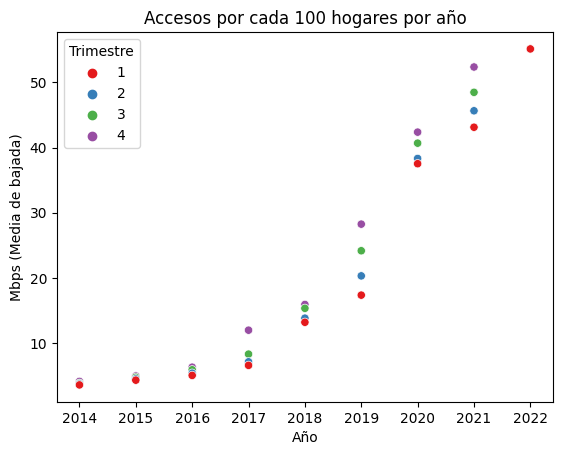

In [24]:

colores = sns.color_palette("Set1", 4)
sns.scatterplot(data=df_datos_trimes, x='Año', y='Mbps (Media de bajada)', hue='Trimestre',palette=colores)
plt.title('Accesos por cada 100 hogares por año')
plt.show()

Text(0.5, 0, 'Mbps (Media de bajada)')

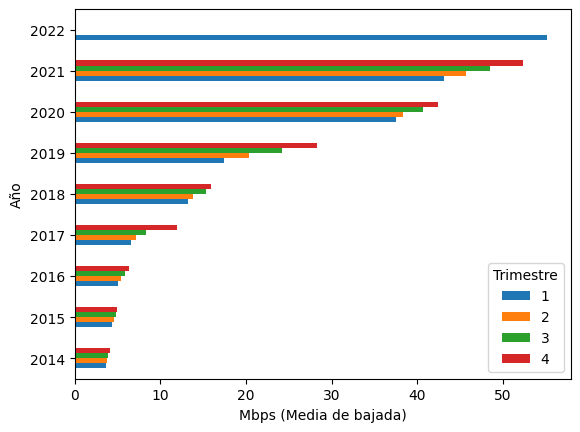

In [25]:
df_datos_trimes.groupby(['Año','Trimestre'])['Mbps (Media de bajada)'].mean().unstack(1).plot.barh()
plt.xlabel('Mbps (Media de bajada)')

---

- **Relacion entre año y tipo de tecnología:** *Podemos observar que a medida que pasan los años los accesos por cada 100 hogares 
 aumenta* , cabe resaltar que por cada año aparecen 4 puntos indicando el trimestre

In [26]:
#df_datos_trimes.groupby(['Año','Trimestre'])['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros_tecno'].mean().unstack(1).plot.barh()
#plt.xlabel('Mbps (Media de bajada)')

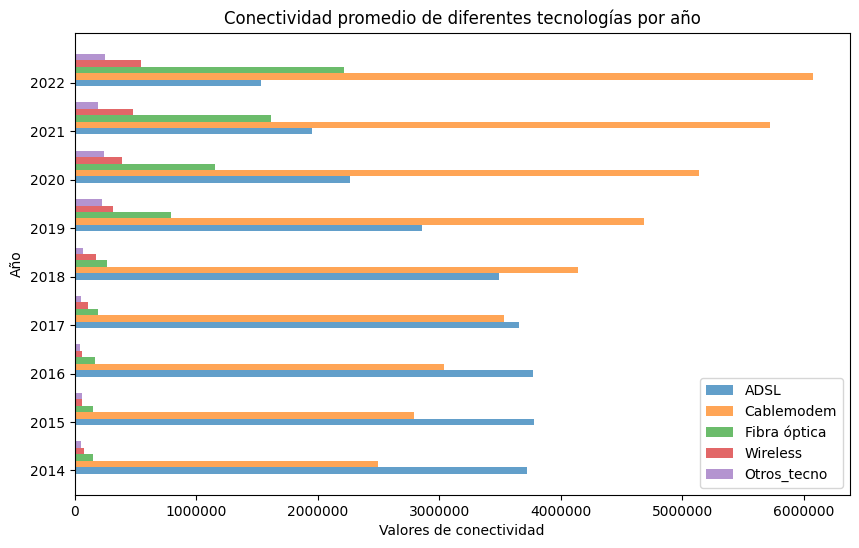

In [27]:
df_tecnologias = df_datos_trimes[['Año', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros_tecno']]

df_media = df_tecnologias.groupby('Año').mean()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Obtener la lista de tecnologías
tecnologias = df_tecnologias.columns[1:]

# Obtener el número de tecnologías
num_tecnologias = len(tecnologias)

# Definir el ancho de cada barra
ancho_barra = 0.2
espacio = 0.1

# Crear el rango de posiciones para las barras como un array de NumPy con el espacio adicional
posiciones = np.arange(len(df_media)) * (num_tecnologias * (ancho_barra + espacio))

# Crear el gráfico de barras horizontal para cada tecnología
for i, tecnologia in enumerate(tecnologias):
    plt.barh(posiciones + i * ancho_barra, df_media[tecnologia], height=ancho_barra, label=tecnologia, alpha=0.7)

# Configurar los ejes y el título
plt.xlabel('Valores de conectividad')
plt.ylabel('Año')
plt.title('Conectividad promedio de diferentes tecnologías por año')

# Agregar una leyenda
plt.legend()

# Ajustar las etiquetas del eje y para que muestren los años
#plt.yticks(posiciones + ((num_tecnologias - 1) * ancho_barra) / 2, df_media.index)
plt.yticks(posiciones, df_media.index)


plt.ticklabel_format(axis='x', style='plain')

# Mostrar el gráfico
plt.show()


---

* #####   **Relacion entre año y rango de velocidad:** *Podemos observar que a medida que pasan los años los accesos por cada 100 hogares aumenta , cabe resaltar que por cada año aparecen 4 puntos indicando el trimestre*

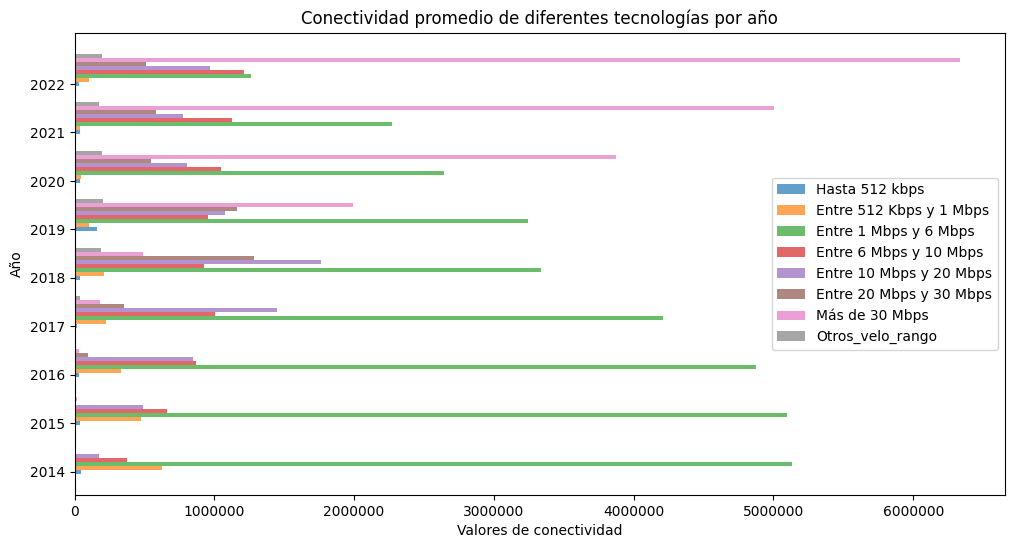

In [37]:

#colores = sns.color_palette("husl", 8)

df_velocidad = df_datos_trimes[['Año','Hasta 512 kbps','Entre 512 Kbps y 1 Mbps','Entre 1 Mbps y 6 Mbps','Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps','Entre 20 Mbps y 30 Mbps','Más de 30 Mbps','Otros_velo_rango']]

df_media = df_velocidad.groupby('Año').mean()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Obtener la lista de tecnologías
rango_velocidades = df_velocidad.columns[1:]

# Obtener el número de tecnologías
num_velocidades = len(rango_velocidades)

# Definir el ancho de cada barra
ancho_barra = 0.2
espacio = 0.1

# Crear el rango de posiciones para las barras como un array de NumPy con el espacio adicional
posiciones = np.arange(len(df_media)) * (num_velocidades * (ancho_barra + espacio))

# Crear el gráfico de barras horizontal para cada tecnología
for i, rango_velocidad in enumerate(rango_velocidades):
    plt.barh(posiciones + i * ancho_barra, df_media[rango_velocidad], height=ancho_barra, label=rango_velocidad, alpha=0.7)

# Configurar los ejes y el título
plt.xlabel('Valores de conectividad')
plt.ylabel('Año')
plt.title('Conectividad promedio de diferentes rango de velocidades por año')

# Agregar una leyenda
plt.legend()

# Ajustar las etiquetas del eje y para que muestren los años
#plt.yticks(posiciones + ((num_tecnologias - 1) * ancho_barra) / 2, df_media.index)
plt.yticks(posiciones, df_media.index)


plt.ticklabel_format(axis='x', style='plain')

# Mostrar el gráfico
plt.show()

---

# Análisis de los Datos con Provincia

In [41]:
df_datos_provin=pd.read_csv('datos_provincias_sinID.csv',delimiter=',',header='infer')

In [42]:
df_datos_provin.dtypes

Año                               int64
Trimestre                         int64
Provincia                        object
Accesos por cada 100 hogares    float64
Banda ancha fija                  int64
Dial up                           int64
Total_BA_P                        int64
ADSL                              int64
Cablemodem                        int64
Fibra óptica                      int64
Wireless                          int64
Otros_tecno_P                     int64
Total_tecno_P                     int64
Mbps (Media de bajada)          float64
Hasta 512 kbps                  float64
Entre 512 Kbps y 1 Mbps         float64
Entre 1 Mbps y 6 Mbps           float64
Entre 6 Mbps y 10 Mbps          float64
Entre 10 Mbps y 20 Mbps         float64
Entre 20 Mbps y 30 Mbps         float64
Más de 30 Mbps                  float64
Otros_velo_rango_P              float64
Total_velo_rango_P              float64
dtype: object

In [43]:
from pandas_profiling import ProfileReport
data = pd.read_csv('datos_provincias_sinID.csv',delimiter=',',header='infer')
profile = ProfileReport(data)
profile.to_file("informe_1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 13.21it/s]


---

- **Relacion entre año, provincia y accesos por cada 100 hogares:** *Podemos observar que a medida que pasan los años los accesos por cada 100 hogares 
 aumenta* , cabe resaltar que por cada año aparecen 4 puntos indicando el trimestre

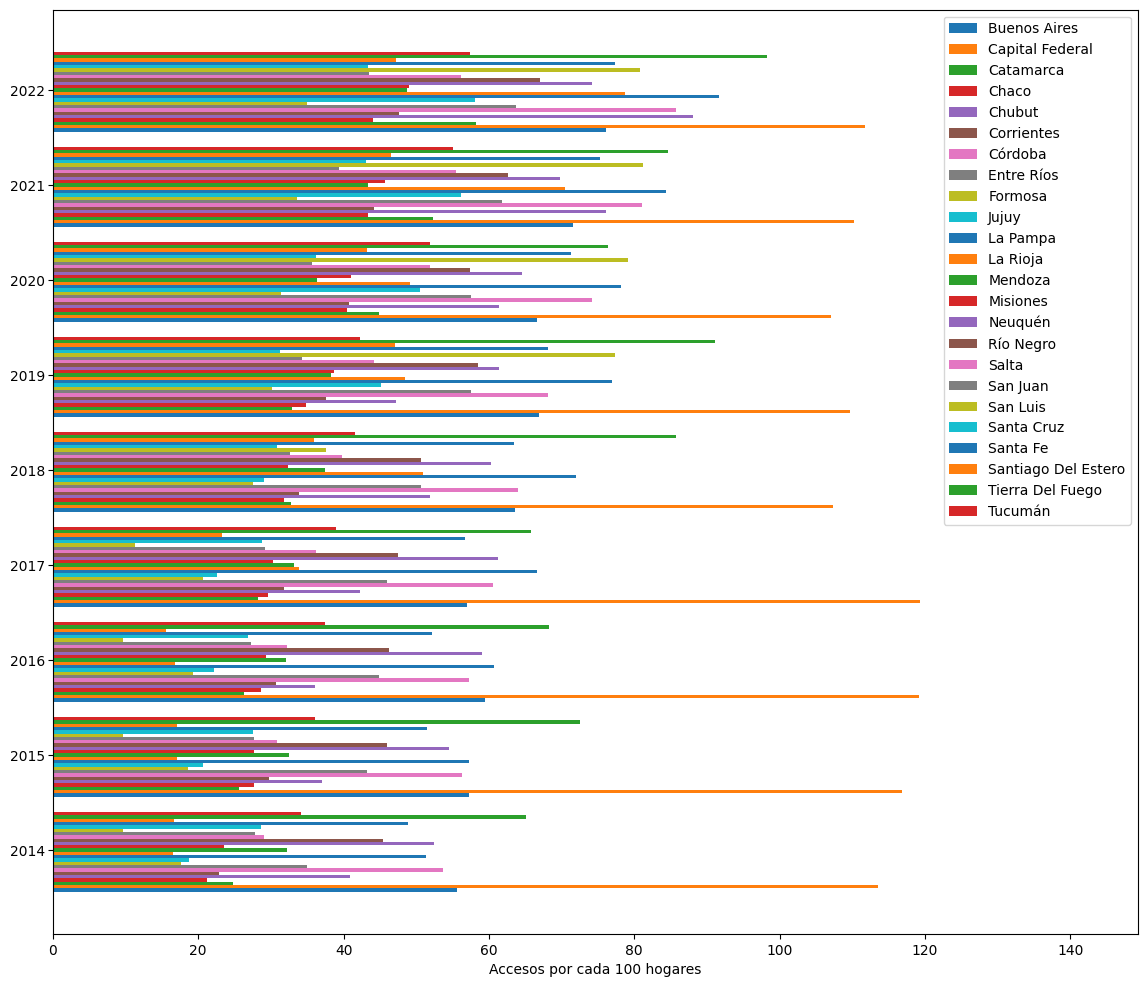

In [80]:

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
datos = df_datos_provin.groupby(['Año','Provincia'])['Accesos por cada 100 hogares'].mean().unstack(1)
posiciones = np.arange(len(datos.index))
ancho_barra = 0.035 # Ancho de cada barra
desplazamiento = np.arange(len(datos.columns)) - len(datos.columns) / 2  # Desplazamiento horizontal  # Desplazamiento horizontal

for i, columna in enumerate(datos.columns):
    plt.barh(posiciones + desplazamiento[i] * ancho_barra, datos[columna], height=ancho_barra, label=columna)

plt.gca().set_yticks(posiciones)  # Establecer las posiciones de las etiquetas del eje y
plt.gca().tick_params(axis='y', which='major', pad=2)  # Ajustar el espaciado entre las etiquetas del eje y
plt.gca().set_yticklabels(datos.index)  # Establecer las etiquetas del eje y con los años
plt.xlabel('Accesos por cada 100 hogares')
plt.legend()

valor_maximo = datos.max().max() + 30  # Obtener el valor máximo y agregar 1
plt.xlim(0, valor_maximo)

plt.show()
plt.show()

---

- **Relacion entre año, provincia y Mbps (Media de bajada):** *Podemos observar que a medida que pasan los años los accesos por cada 100 hogares 
 aumenta* , cabe resaltar que por cada año aparecen 4 puntos indicando el trimestre

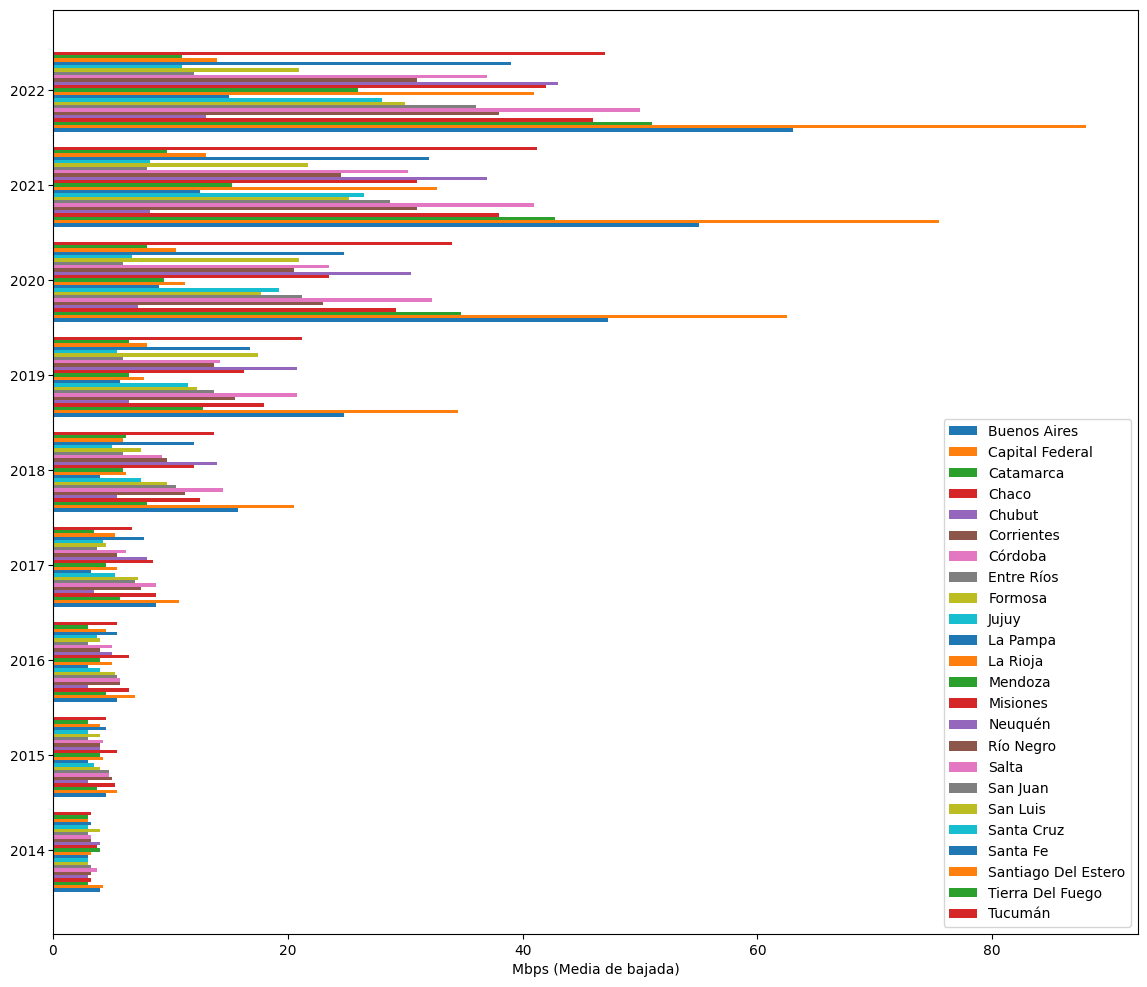

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
datos = df_datos_provin.groupby(['Año','Provincia'])['Mbps (Media de bajada)'].mean().unstack(1)
posiciones = np.arange(len(datos.index))
ancho_barra = 0.035 # Ancho de cada barra
desplazamiento = np.arange(len(datos.columns)) - len(datos.columns) / 2  # Desplazamiento horizontal  # Desplazamiento horizontal

for i, columna in enumerate(datos.columns):
    plt.barh(posiciones + desplazamiento[i] * ancho_barra, datos[columna], height=ancho_barra, label=columna)

plt.gca().set_yticks(posiciones)  # Establecer las posiciones de las etiquetas del eje y
plt.gca().tick_params(axis='y', which='major', pad=2)  # Ajustar el espaciado entre las etiquetas del eje y
plt.gca().set_yticklabels(datos.index)  # Establecer las etiquetas del eje y con los años
plt.xlabel('Mbps (Media de bajada)')
plt.legend()

plt.show()

---

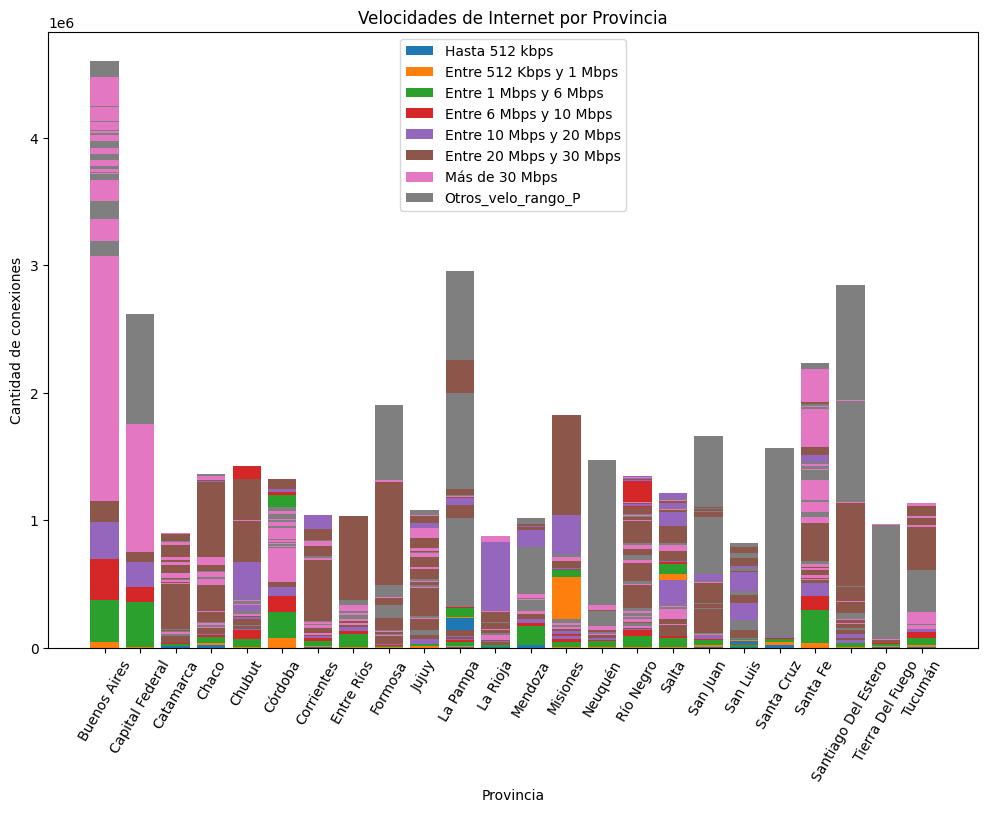

In [89]:
plt.figure(figsize=(12, 8))
df=df_datos_provin[['Provincia', 'Hasta 512 kbps','Entre 512 Kbps y 1 Mbps','Entre 1 Mbps y 6 Mbps','Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps','Entre 20 Mbps y 30 Mbps','Más de 30 Mbps','Otros_velo_rango_P']]
provincias = df['Provincia']
velocidades = df.drop('Provincia', axis=1).columns

plt.bar(provincias, df['Hasta 512 kbps'], label='Hasta 512 kbps')
bottom = df['Hasta 512 kbps']

for velocidad in velocidades[1:]:
    plt.bar(provincias, df[velocidad], bottom=bottom, label=velocidad)
    bottom += df[velocidad]

plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones')
plt.xticks(rotation=60)

plt.title('Velocidades de Internet por Provincia')
plt.legend()
plt.show()




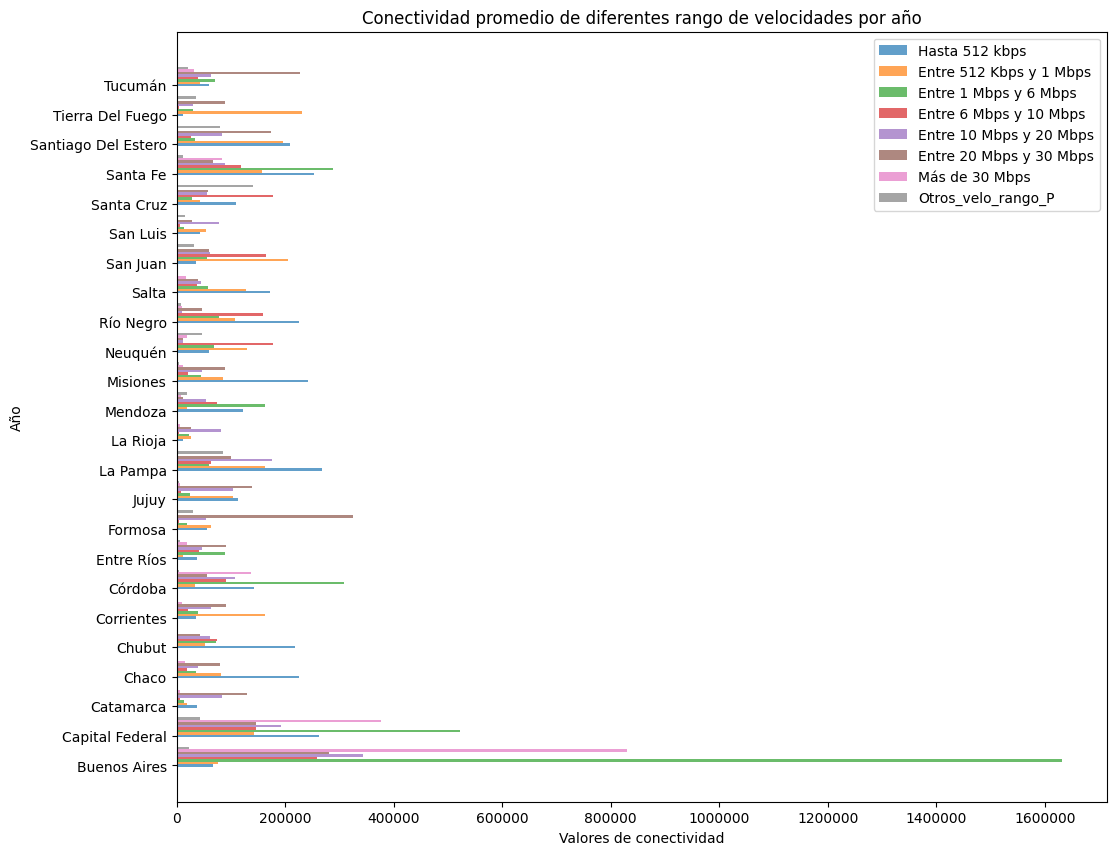

In [94]:
df_velocidad = df_datos_provin[['Provincia','Hasta 512 kbps','Entre 512 Kbps y 1 Mbps','Entre 1 Mbps y 6 Mbps','Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps','Entre 20 Mbps y 30 Mbps','Más de 30 Mbps','Otros_velo_rango_P']]

df_media = df_velocidad.groupby('Provincia').mean()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Obtener la lista de tecnologías
rango_velocidades = df_velocidad.columns[1:]

# Obtener el número de tecnologías
num_velocidades = len(rango_velocidades)

# Definir el ancho de cada barra
ancho_barra = 0.2
espacio = 0.1

# Crear el rango de posiciones para las barras como un array de NumPy con el espacio adicional
posiciones = np.arange(len(df_media)) * (num_velocidades * (ancho_barra + espacio))

# Crear el gráfico de barras horizontal para cada tecnología
for i, rango_velocidad in enumerate(rango_velocidades):
    plt.barh(posiciones + i * ancho_barra, df_media[rango_velocidad], height=ancho_barra, label=rango_velocidad, alpha=0.7)

# Configurar los ejes y el título
plt.xlabel('Valores de conectividad')
plt.ylabel('Año')
plt.title('Conectividad promedio de diferentes rango de velocidades por año')

# Agregar una leyenda
plt.legend()

# Ajustar las etiquetas del eje y para que muestren los años
#plt.yticks(posiciones + ((num_tecnologias - 1) * ancho_barra) / 2, df_media.index)
plt.yticks(posiciones, df_media.index)


plt.ticklabel_format(axis='x', style='plain')

# Mostrar el gráfico
plt.show()

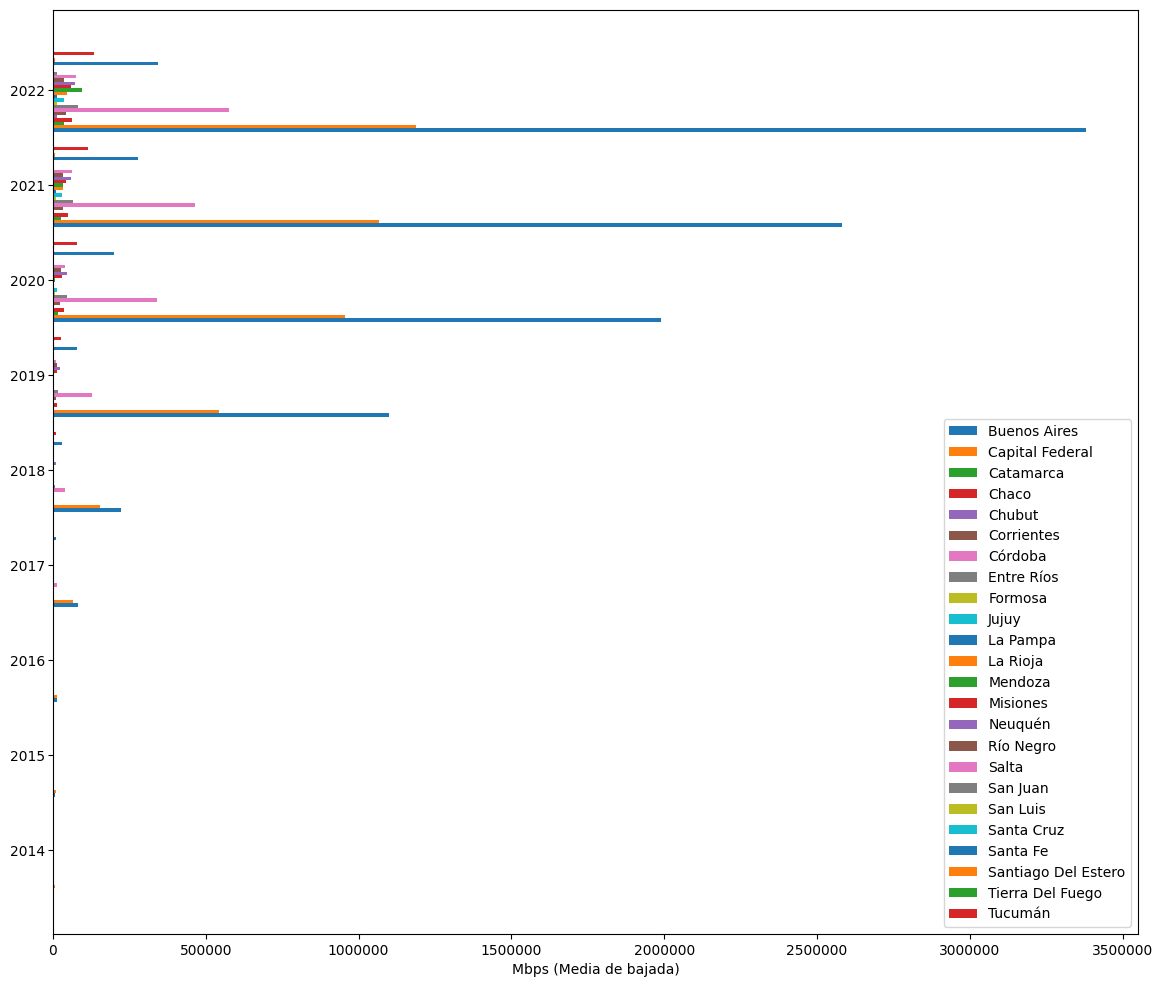

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
datos = df_datos_provin.groupby(['Año','Provincia'])['Más de 30 Mbps'].mean().unstack(1)
posiciones = np.arange(len(datos.index))
ancho_barra = 0.035 # Ancho de cada barra
desplazamiento = np.arange(len(datos.columns)) - len(datos.columns) / 2  # Desplazamiento horizontal  # Desplazamiento horizontal

for i, columna in enumerate(datos.columns):
    plt.barh(posiciones + desplazamiento[i] * ancho_barra, datos[columna], height=ancho_barra, label=columna)

plt.gca().set_yticks(posiciones)  # Establecer las posiciones de las etiquetas del eje y
plt.gca().tick_params(axis='y', which='major', pad=2)  # Ajustar el espaciado entre las etiquetas del eje y
plt.gca().set_yticklabels(datos.index)  # Establecer las etiquetas del eje y con los años
plt.xlabel('Mbps (Media de bajada)')
plt.ticklabel_format(axis='x', style='plain')
plt.legend()

plt.show()

In [96]:
df_velocidad[df_velocidad['Provincia']=='Buenos Aires']

,Provincia,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,Otros_velo_rango_P
0,Buenos Aires,31591.0,30056.0,313382.0,321756.0,290127.0,161183.0,3381049.0,26280.0
24,Buenos Aires,37821.0,11026.0,352950.0,331292.0,297296.0,196021.0,3259793.0,22958.0
48,Buenos Aires,37193.0,31149.0,1108940.0,248153.0,141383.0,192797.0,2482266.0,9728.0
72,Buenos Aires,37192.0,31178.0,1096049.0,244001.0,140322.0,236897.0,2337604.0,9108.0
96,Buenos Aires,36939.0,31187.0,1108368.0,240520.0,163747.0,222061.0,2246313.0,10867.0
120,Buenos Aires,36939.0,31197.0,1109865.0,242243.0,214171.0,213588.0,2176242.0,9016.0
144,Buenos Aires,37542.0,31514.0,1113823.0,234710.0,219772.0,194248.0,2085815.0,19853.0
168,Buenos Aires,37542.0,31606.0,1129236.0,241336.0,233132.0,188995.0,1894466.0,21233.0
192,Buenos Aires,38215.0,36802.0,1122034.0,236421.0,247977.0,205780.0,1802583.0,28935.0
216,Buenos Aires,33489.0,27537.0,1177446.0,262297.0,247106.0,452570.0,1465133.0,28131.0
